{'10': 500}


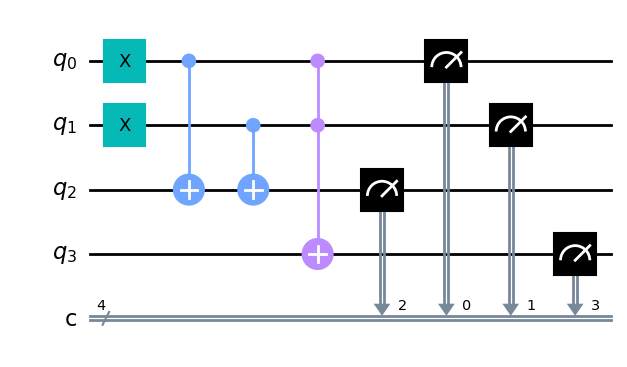

In [2]:
import pennylane as qml

# Define the device with 500 shots
dev = qml.device('qiskit.aer', wires=4, shots=500)

# Define the quantum function
@qml.qnode(dev)
def half_adder(x=[1,1]):
    # Encode input
    qml.BasisState(x, wires=[0, 1])

    # CX gates
    qml.CNOT([0, 2])
    qml.CNOT([1, 2])

    # Toffoli gate (CCX)
    qml.Toffoli([0, 1, 3])

    # Measurement
    return [qml.sample(qml.PauliZ(i)) for i in [2, 3]]

def results_to_qiskit_format(counts):
    # Convert +1 to '0' and -1 to '1'
    formatted_counts = [''.join(['0' if i == 1 else '1' for i in sample]) for sample in zip(*counts)]
    
    # Reverse the bit order to match Qiskit's convention(outcome[start:stop:step])
    formatted_counts = [outcome[::-1] for outcome in formatted_counts]

    # Count occurrences of each result
    return {outcome: formatted_counts.count(outcome) for outcome in set(formatted_counts)}

# Execute the circuit
x = [1, 1]  # input '11'
counts = half_adder(x)
formatted_results = results_to_qiskit_format(counts)
print(formatted_results)
dev._circuit.draw(output="mpl")

In [3]:
import pennylane as qml

# Define the device with the default shot setting (1000)
dev = qml.device('qiskit.aer', wires=4, shots=2)

# Define the quantum function
@qml.qnode(dev)
def half_adder(x=[1,1]):
    # Encode input
    qml.BasisState(x, wires=[0, 1])

    # CX gates
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[1, 2])
    
    # Toffoli gate (CCX)
    qml.Toffoli(wires=[0, 1, 3])

    # Measurement
    return qml.expval(qml.PauliZ(3))

# Execute the circuit
x = [1, 0] # input '11'
counts = half_adder(x)
print(counts)

-1.0
